## 1. Importing Libraries 

In [2]:
# for linear algebra
import numpy as np

# for data processing, CSV file I/O
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

In [3]:
# import libraries for feature engineering and preprocessing:
# !pip3 install category_encoders

from sklearn.preprocessing import StandardScaler, LabelEncoder
from category_encoders import CatBoostEncoder

In [4]:
# importing metrics to see how well the model predicts:
from sklearn.metrics import *

## 2. Data Set

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. 
* There are total 1067 rows and 12 columns and the data can be descriped as follows:

Transmission:
* A = Automatic
* AM = Automated manual
* AS = Automatic with select shift
* AV = Continuously variable
* M = Manual

Fuel type:
* X = Regular gasoline
* Z = Premium gasoline
* D = Diesel
* E = Ethanol (E85)


Brands = Company of the vehicle

Model Year = the year of release

Vehicle Class = Class of vehicle depending on their utility, capacity and weight

Engine Size = Size of engine

Cylinders = Number of cylinders

Transmission = Transmission type

Fuel type = Type of Fuel used

Fuel Consumption City = Fuel consumption in city roads 

Fuel Consumption Hwy = Fuel consumption in Hwy roads

Fuel Consumption Comb = The combined fuel consumption

Fuel Consumption Comb mpg = The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)

## 3. Exploratory data analysis (EDA)

### Reading the data:

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
# Using read_csv function and pass the csv file to it to read the csv

data = pd.read_csv("/kaggle/input/fuelconsumptionco2/FuelConsumptionCo2.csv")

In [7]:
# Display the head of the salaries csv file [first 10 rows]

data.head(10)

In [8]:
# Display the tail of the salaries csv file [last 10 rows]

data.tail(10)

In [9]:
# Using shape attribute to obtain the shape of a DataFrame

data.shape

In [10]:
# Using the info() method to print information about the df

data.info()

## Using Describe Function:

* Generate descriptive statistics.
* Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
* The describe() function in pandas is very handy in getting various summary statistics.
* This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [11]:
# describe() give back summary statistics.

data.describe()

In [12]:
# describe().T to transpose the df.

data.describe().T

In [13]:
# Getting the columns names that we have in the dataset

data.columns

In [14]:
# Get the data type of each column in the data set

data.dtypes

In [15]:
# Get the number of unique values in the MODELYEAR column

data["MODELYEAR"].nunique()

#### That means we only have one year of release so it sould be dropped later as it won't affect the data

### check for null values:

In [16]:
# Check if we have null values in our dataset

data.isnull().values.any()

In [17]:
# get the sum of the null values if each column of the dataset

data.isnull().sum()

In [18]:
# Get the Total number of missing data and it's percentage in each column of the dataset

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(data)

### Check for duplicated data

In [19]:
# Check for duplicated data

data_duplicated = data[data.duplicated() == True]
data_duplicated

In [20]:
# Get the sum of the number of duplicated data in these columns

sum(data_duplicated.groupby(by =['Brands','VEHICLECLASS','ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE'])['FUELCONSUMPTION_CITY'].nunique())

#### Code to drop all duplicate data (I prefer not to use it, as I don't drop any data)

In [21]:
# [optional] >> code to drop duplicated data

# idx = data_duplicated.index
# Kick Outliers
# for i in idx:
#     data.drop(i, axis = 0, inplace = True)

### Display the distribution of all Brands:

In [22]:
# Get the unique values of the Brands columns in the dataset

unique_brands = data["Brands"].unique()

In [23]:
# print the unique_brands

print(repr(unique_brands))

In [24]:
# Get the length of them

len(unique_brands)

## 4. Brands

In [25]:
# make a Bar polt that display each Brand in the dataset and the number of vehicles associated with that brand

data_Brands = data['Brands'].value_counts().reset_index().rename(columns={'index':'Brands','Brands':'Count'})[0:25]
data_Brands
fig = go.Figure(go.Bar(
    x = data_Brands['Brands'], y = data_Brands['Count'],
    marker = {'color': data_Brands['Count'], 
    'colorscale': 'Viridis'},  
    text = data_Brands['Count'],
    textposition = "outside",
))
fig.update_layout(title_text = 'Top 25 Company', xaxis_title = "Company ", yaxis_title = "Number Of Vehicles ", title_x=0.5)

fig.show()

## 5. Vehichles

### Classes Vs. No.of vehichles:

In [26]:
# make a Bar polt that display each Class in the dataset and the number of vehicles associated with that brand

data_Vehicle_Class = data['VEHICLECLASS'].value_counts().reset_index().rename(columns={'index':'Vehicle_Class','VEHICLECLASS':'Count'})
fig = go.Figure(go.Bar(
    x = data_Vehicle_Class['Vehicle_Class'], y = data_Vehicle_Class['Count'],
    marker = {'color': data_Vehicle_Class['Count'], 
    'colorscale': 'Viridis'},  
    text=data_Vehicle_Class['Count'],
    textposition = "inside",
))

fig.update_layout(title_text=' Vehicle Class',xaxis_title="Vehicle Class",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

## 6. Engine

### Size Vs. Count

In [27]:
# marginal can be `box` or `violin` or `rug`

# It is represented as mini plots that are added to the graph to descripe the record values at each point 

fig = px.histogram(data, x = "ENGINESIZE", marginal="rug",
                         hover_data=data.columns)
fig.show()

In [28]:
sns.set_style(style="whitegrid")
ax = sns.swarmplot(x=data["ENGINESIZE"][0:250])

### Cylinders Vs. Engine Size

In [29]:
fig = px.scatter(data, x="ENGINESIZE", y="CYLINDERS")
fig.update_layout(title_text = 'Cylinders vs Engine Size ', xaxis_title = "Engine Size", yaxis_title = "Cylinders", title_x = 0.5)
fig.show()

## 7. Cylinders

In [30]:
fig = px.histogram(data, x="CYLINDERS")
fig.update_layout(title_text = 'Distribution Of Cylinders', xaxis_title = "Cylinders", yaxis_title = "Number Of Vehicles", title_x = 0.5)
fig.show()

In [31]:
sns.set_style(style="whitegrid")
ax = sns.swarmplot(x=data["CYLINDERS"][0:250])

## 8.Transmission

In [32]:
data_Transmission = data['TRANSMISSION'].value_counts().reset_index().rename(columns={'index':'Transmission','TRANSMISSION':'Count'})
data_Transmission
fig = px.pie(data_Transmission, values='Count', names='Transmission')

# insidetextorientation can be: tangential, radial, auto or horizontal

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12, insidetextorientation='auto')
fig.update_layout(title="Transmission Distribution",title_x=0.5)
fig.show()

### Transmission Distribution:

In [33]:
data_Transmission = data['TRANSMISSION'].value_counts().reset_index().rename(columns={'index':'Transmission','TRANSMISSION':'Count'})

fig = go.Figure(go.Bar(
    x = data_Transmission['Transmission'], y = data_Transmission['Count'],
    marker = {'color': data_Transmission['Count'], 
    'colorscale': 'Viridis'},  
    text = data_Transmission['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Transmission Distribution ',xaxis_title="Transmission ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

## 9. Fuel Type

In [34]:
data_Fuel_Type = data['FUELTYPE'].value_counts().reset_index().rename(columns={'index':'Fuel_Type','FUELTYPE':'Count'})

fig = go.Figure(go.Bar(
    x = data_Fuel_Type['Fuel_Type'], y = data_Fuel_Type['Count'],
    marker = {'color': data_Fuel_Type['Count'], 
    'colorscale': 'Viridis'},  
    text = data_Fuel_Type['Count'],
    textposition = "inside",
))
fig.update_layout(title_text = 'Fuel Type Distribution', xaxis_title = "Fuel Type", yaxis_title = "Number Of Vehicles", title_x = 0.5)
fig.show()

### Fule Types are represented as follows:

* X = Regular gasoline
* Z = Premium gasoline
* E = Ethanol (E85)
* D = Diesel
> Note: we have found that the most fuel type used is (x : Regular gasoline) and the lowest one is (D : Diesel)



## 10. Fuel Consumption

In [35]:
fig = go.Figure(data=[go.Histogram(x = data["FUELCONSUMPTION_CITY"],
                                   histnorm='probability')])

fig.update_layout(title_text='Normalized Fuel Consumption City  ',
                  xaxis_title="Fuel Consumption",
                  yaxis_title="Ratio",
                  title_x=0.5)

fig.show()

###  Fuel consumption in city roads

In [36]:
fig = go.Figure()
fig.add_trace(go.Box(
    x = data["FUELCONSUMPTION_CITY"],
    name = 'FCC',
    marker_color = 'green',
    
    # represent mean and standard deviation
    boxmean='sd' 
))

fig.update_layout(title_text='Fuel Consumption City',xaxis_title=" L / n km ",title_x=0.5)
fig.show()

### Normalized Fuel consumption in city roads

In [37]:
fig = go.Figure(data = [go.Histogram( x = data["FUELCONSUMPTION_CITY"], histnorm = 'probability')])
fig.update_layout(title_text = 'Normalized Fuel consumption in city roads', xaxis_title = "Fuel Consumption", yaxis_title = "Ratio",title_x = 0.5)
fig.show()

### Fuel consumption in Hwy roads

In [38]:
fig = go.Figure()
fig.add_trace(go.Box(
    x = data["FUELCONSUMPTION_HWY"],
    name = 'FCHwy',
    marker_color = 'blue',
    
    # represent mean and standard deviation
    boxmean='sd' 
))
fig.update_layout(title_text='Fuel Consumption Highways ',xaxis_title=" L / n km ",title_x=0.5)
fig.show()

### Normalized Fuel consumption in High Way Roads (Hwy)

In [39]:
fig = go.Figure(data = [go.Histogram( x = data["FUELCONSUMPTION_HWY"], histnorm = 'probability')])
fig.update_layout(title_text = 'Normalized Fuel consumption in High Way Roads (Hwy)', xaxis_title = "Fuel Consumption", yaxis_title = "Ratio", title_x = 0.5)
fig.show()

### The combined fuel consumption

In [40]:
fig = go.Figure()
fig.add_trace(go.Box(
    x = data["FUELCONSUMPTION_COMB"],
    name = 'CFC',
    marker_color = 'red',
    
    # represent mean and standard deviation
    boxmean='sd' 
))
fig.update_layout(title_text = 'The Combined Fuel Consumption', xaxis_title = "L / n km", title_x = 0.5)
fig.show()

### Normalized Fuel Consumption Combined (Total)

In [41]:
fig = go.Figure(data=[go.Histogram(x=data["FUELCONSUMPTION_COMB"],
                                   histnorm = 'probability')])
fig.update_layout(title_text = 'Normalized Fuel Consumption Combined',
                  xaxis_title = "Fuel Consumption",
                  yaxis_title = "Ratio",
                  title_x = 0.5)
fig.show()

In [42]:
fig = go.Figure()
fig.add_trace(go.Box(
    x = data["FUELCONSUMPTION_COMB_MPG"],
    name='CFC_MPG',
    marker_color='royalblue',
    
    # represent mean and standard deviation
    boxmean='sd' 
))
fig.update_layout(title_text = 'The Combined Fuel Mile Per Gallon',
                  xaxis_title = "Mpg (Mile Per Gallon)",
                  title_x = 0.5)
fig.show()

### Normalized Fuel Consumption Combined  Mile Per Gallon

In [43]:
fig = go.Figure(data=[go.Histogram(x = data["FUELCONSUMPTION_COMB_MPG"],
                                   histnorm = 'probability')])
fig.update_layout(title_text = 'Normalized Fuel Consumption Combined  Mile Per Gallon',
                  xaxis_title = "Fuel Consumption",
                  yaxis_title = "Ratio",
                  title_x=0.5)
fig.show()

## 11. CO2 Emissions

In [44]:
fig = go.Figure()
fig.add_trace(go.Box(
    x = data["CO2EMISSIONS"],
    name = 'CO2 Emissions ',
    marker_color = 'black',
    
    # represent mean and standard deviation
    boxmean='sd' 
))
fig.update_layout(title_text = 'CO2 Emissions',
                  xaxis_title = "Quantity",
                  title_x=0.5)
fig.show()

In [45]:
print("Correlation Matrix (Heat Map)")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=.5, fmt=".2f", annot = True);

## 12. Data Preprocessing

### Defining the labels:

In [46]:
y = data['CO2EMISSIONS']

data.drop(['CO2EMISSIONS'], axis=1, inplace=True)

### Finding the categorical columns:

In [47]:
c = (data.dtypes == 'object')

In [48]:
c[c]

In [49]:
list(c[c])

In [50]:
catlist = list(c[c].index)

In [51]:
catlist

### Looking at the data it seems like we might miss some categorical features that are actually numerical:



In [52]:
catlist.append('MODELYEAR')
catlist.append('CYLINDERS')

In [53]:
print(repr(catlist))

### Lets check for the number of unique variables in each of the categorical columns:



In [54]:
data[catlist].nunique()

### Lets drop the MODELYEAR column since it is a single value:

In [55]:
data.drop(['MODELYEAR'], inplace=True, axis=1)
catlist.remove('MODELYEAR')

In [56]:
data.head()

In [57]:
print(repr(catlist))

### Encoding the categorical columns using CatBoostEncoder:data[catlist]

In [58]:
data[catlist].head()

In [59]:
y_df = pd.DataFrame(y, columns = ['CO2EMISSIONS'])

In [60]:
y_df.head(10)

> Catboost is a target-based categorical encoder. It is a supervised encoder that encodes categorical columns according to the target value. It supports binomial and continuous targets. Target encoding is a popular technique used for categorical encoding.

In [61]:
# Copy the data

encdata = data.copy()

cbe = CatBoostEncoder()

# Fits the encoder according to X and y

cbe.fit(data[catlist], y)

# Perform the transformation to new categorical data

encdata[catlist] = cbe.transform(data[catlist])

### Lets take a look at it:

In [62]:
encdata[catlist].head()

### Using the StandardScaler lets scale the data into values between -1 and 1:



> Using StandardScaler() Function to remove the mean and scales the data to the unit variance
>> The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [63]:
scale = StandardScaler()

# Using fit_transform function to fit to data, then transform it.

# Its input parameter is (encdata) which represent the input samples (x).

scaleddata = scale.fit_transform(encdata)

### Splitting the data into training and test sets:



In [64]:
# Using train_test_split() function to split arrays or matrices into random subsets for train and test data.

# parameters: 

# 1- x: scaleddata
# 2- y: data['CO2EMISSIONS']
# 3- train_size: 0.8
# 4- test_size: 0.2

x_train, x_test, y_train, y_test = train_test_split(scaleddata, y, train_size=0.8, test_size=0.2)

## 13. Training and Predicting:


### Using Linear Regression:

> LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

### R-squared 

> R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted

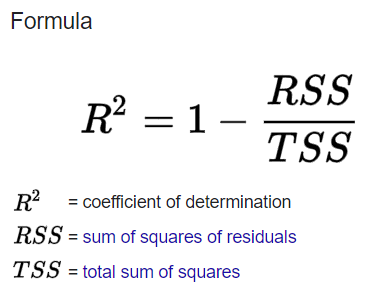

In [65]:
model = LinearRegression()

model.fit(x_train, y_train)

# Using r2_score() function 
    
# parameters:

# 1- y_true: Ground truth (correct) target values.

# 2- y_pred: Estimated target values.

model_preds = model.predict(x_test)

print("The R2 Score is:",r2_score(y_test, model_preds),", while the Mean Absolute Error is:",mean_absolute_error(y_test, model_preds))

In [66]:
model_preds_df = pd.DataFrame(model_preds, columns = ['LR_vals'])
model_preds_df

## 15. Model Enhancement

### Linear Regression Model Enhancement

In [67]:
# Using read_csv function and pass the csv file to it to read the csv

data = pd.read_csv("/kaggle/input/fuelconsumptionco2/FuelConsumptionCo2.csv")

In [68]:
df = data.copy()

In [69]:
df.head()

In [70]:
df.drop(['MODELYEAR','Brands','VEHICLECLASS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','TRANSMISSION','FUELCONSUMPTION_COMB_MPG'],inplace=True,axis=1)

In [71]:
df.head()

In [72]:
df.FUELTYPE.unique()

In [73]:
dums = pd.get_dummies(df['FUELTYPE'],prefix="Fuel_Type")
dums[0:15]

In [74]:
frames = [df, dums]
result = pd.concat(frames,axis=1)

In [75]:
result.head(10)

In [76]:
result.tail(10)

In [77]:
result.drop(['FUELTYPE'],inplace=True,axis=1)
result.head(10)

In [78]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [79]:
df_out=result.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_

In [80]:
np.sort(df_scores)[0:25]

In [81]:
threshold_value = np.sort(df_scores)[24]
threshold_value

In [82]:
Outlier_df= df_out[df_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

In [83]:
# Kick Outliers
for i in indexs:
    result.drop(i, axis = 0,inplace = True)

In [84]:
result.info()

In [85]:
sample_df=result.sample(n=200,random_state=35)
sample_df

In [86]:
indexs=sample_df.index
indexs

In [87]:
# Kick Sample DataFrame
for i in indexs:
    result.drop(i, axis = 0,inplace = True)

In [88]:
sample_df_Xtest=sample_df.drop(['CO2EMISSIONS'],axis=1)

sample_df_ytest=sample_df["CO2EMISSIONS"]

In [89]:
sample_df_Xtest = (sample_df_Xtest - np.min(sample_df_Xtest)) / (np.max(sample_df_Xtest) - np.min(sample_df_Xtest)).values
sample_df_Xtest["ENGINESIZE"]=sample_df_Xtest["ENGINESIZE"].map(lambda x:round(x,2))
sample_df_Xtest["CYLINDERS"]=sample_df_Xtest["CYLINDERS"].map(lambda x:round(x,2))
sample_df_Xtest["FUELCONSUMPTION_COMB"]=sample_df_Xtest["FUELCONSUMPTION_COMB"].map(lambda x:round(x,2))
sample_df_Xtest

### Normalization

In [90]:
X = result.drop(['CO2EMISSIONS'], axis= 1)
y = result["CO2EMISSIONS"]

In [91]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [92]:
X

In [93]:
X["ENGINESIZE"]=X["ENGINESIZE"].map(lambda x:round(x,2))
X["CYLINDERS"]=X["CYLINDERS"].map(lambda x:round(x,2))
X["FUELCONSUMPTION_COMB"]=X["FUELCONSUMPTION_COMB"].map(lambda x:round(x,2))
X

In [94]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

### Build and Train the model

In [95]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [96]:
model_preds = model.predict(X_test)

print("The R2 Score is:", r2_score(y_test, model_preds), ", while the Mean Absolute Error is:",mean_absolute_error(y_test, model_preds))

In [97]:
model.intercept_

In [98]:
model.coef_

In [99]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [100]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [101]:
model.score(X_train, y_train)

In [102]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

In [103]:
pred=model.predict(sample_df_Xtest)
frames = [pred, sample_df_ytest.values]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T

result_pred_Lin=result_pred.rename(columns={0:'Pred_Linear',1:'Real_Value'})
result_pred_Lin["Pred_Linear"]=result_pred_Lin["Pred_Linear"].map(lambda x:round(x,2))
result_pred_Lin["Diff"]=result_pred_Lin["Pred_Linear"]-result_pred_Lin["Real_Value"]
result_pred_Lin["Diff"]=result_pred_Lin["Diff"]
print("Mean Diff: ",abs(result_pred_Lin["Diff"]).mean())
result_pred_Lin.head(20)

In [104]:
model.score(sample_df_Xtest, sample_df_ytest)

## 16. Conclusion 

* As you can see our models are overfeeding.
* Learning is less.
* We can create new data columns.
* We can drop the columns that are not important.
* We need do feature engineering.